# Imports

In [1]:
# Import the required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

In [2]:
# Hide warnings
import warnings
warnings.filterwarnings("ignore")

# Load dataset and cleanup

In [3]:
# Read the csv files
rental = pd.read_csv('day.csv', on_bad_lines='skip')
rental.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
rental.shape

(730, 16)

In [5]:
# We will describe all the numerical variables

rental.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Lets ckeck the missing values for each column
rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
rental.isnull().sum()

# we see that none of the columns have missing values

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# We can drop column instant as it just holds record index which is irelevant for our analysis
# We can drop column dteday as we have individual columns for month and year

rental = rental.drop(['instant', 'dteday'], axis=1)
rental.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
# Our target variable is cnt, as we are intrested in the cumulative count of rentals, we can drop the columns casual and registered
rental = rental.drop(['casual', 'registered'], axis=1)
rental.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


# Visualise data

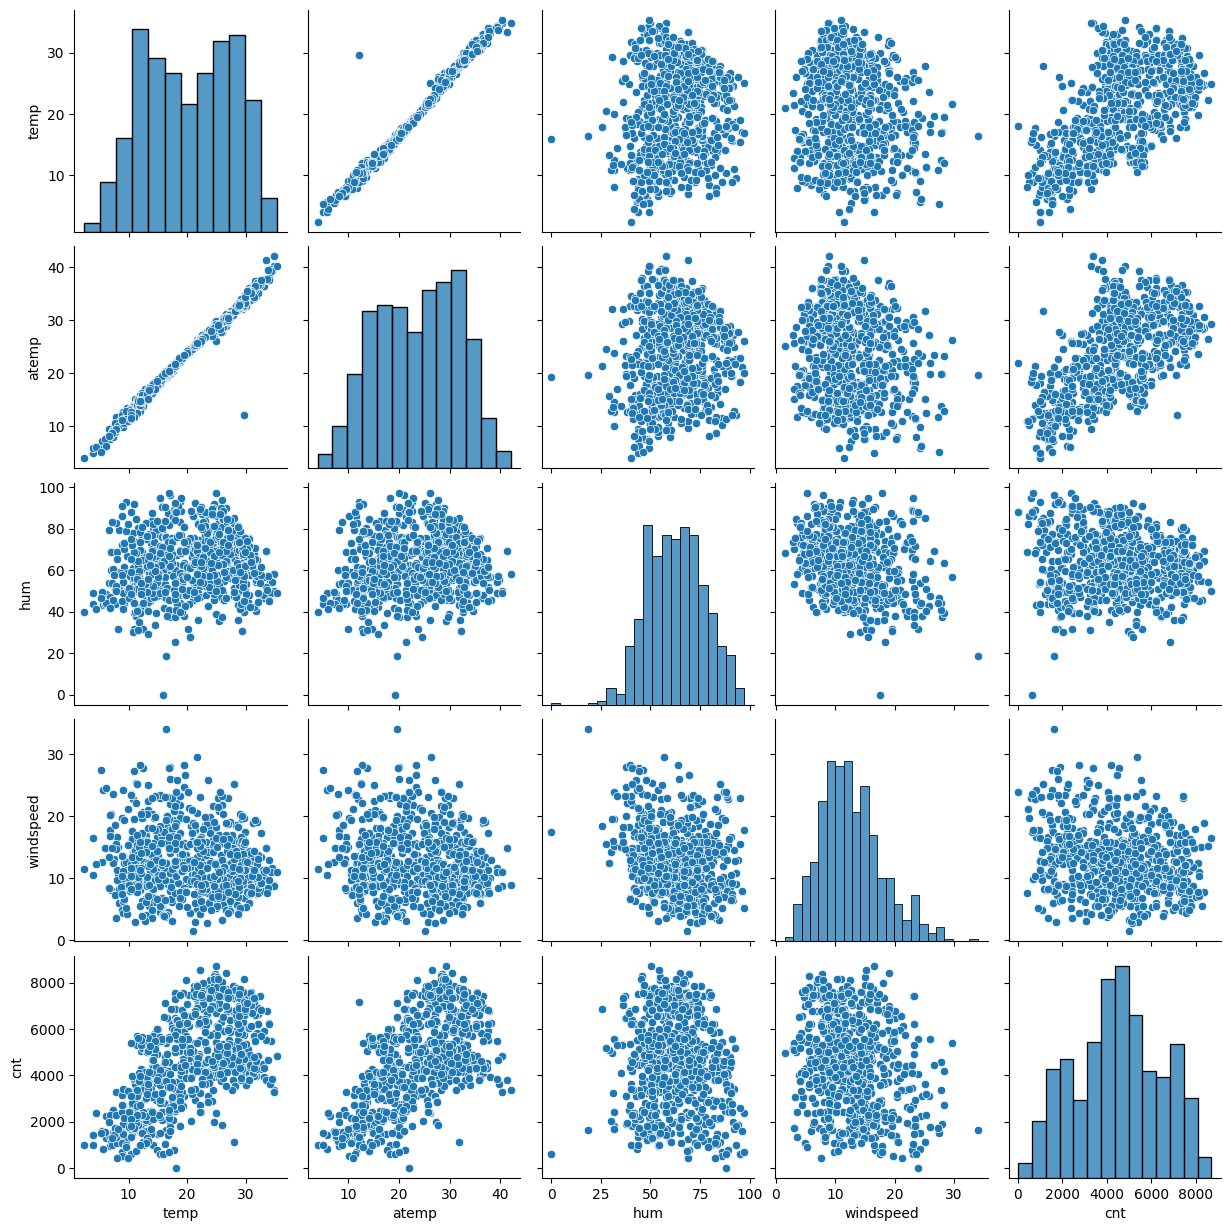

In [10]:
# Lets understand the relationship our numeric features and taget variable

numeric_vars = rental[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(numeric_vars)
plt.show()

# We see there is some linear relationship between temp, atemp and target variable

In [11]:
rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


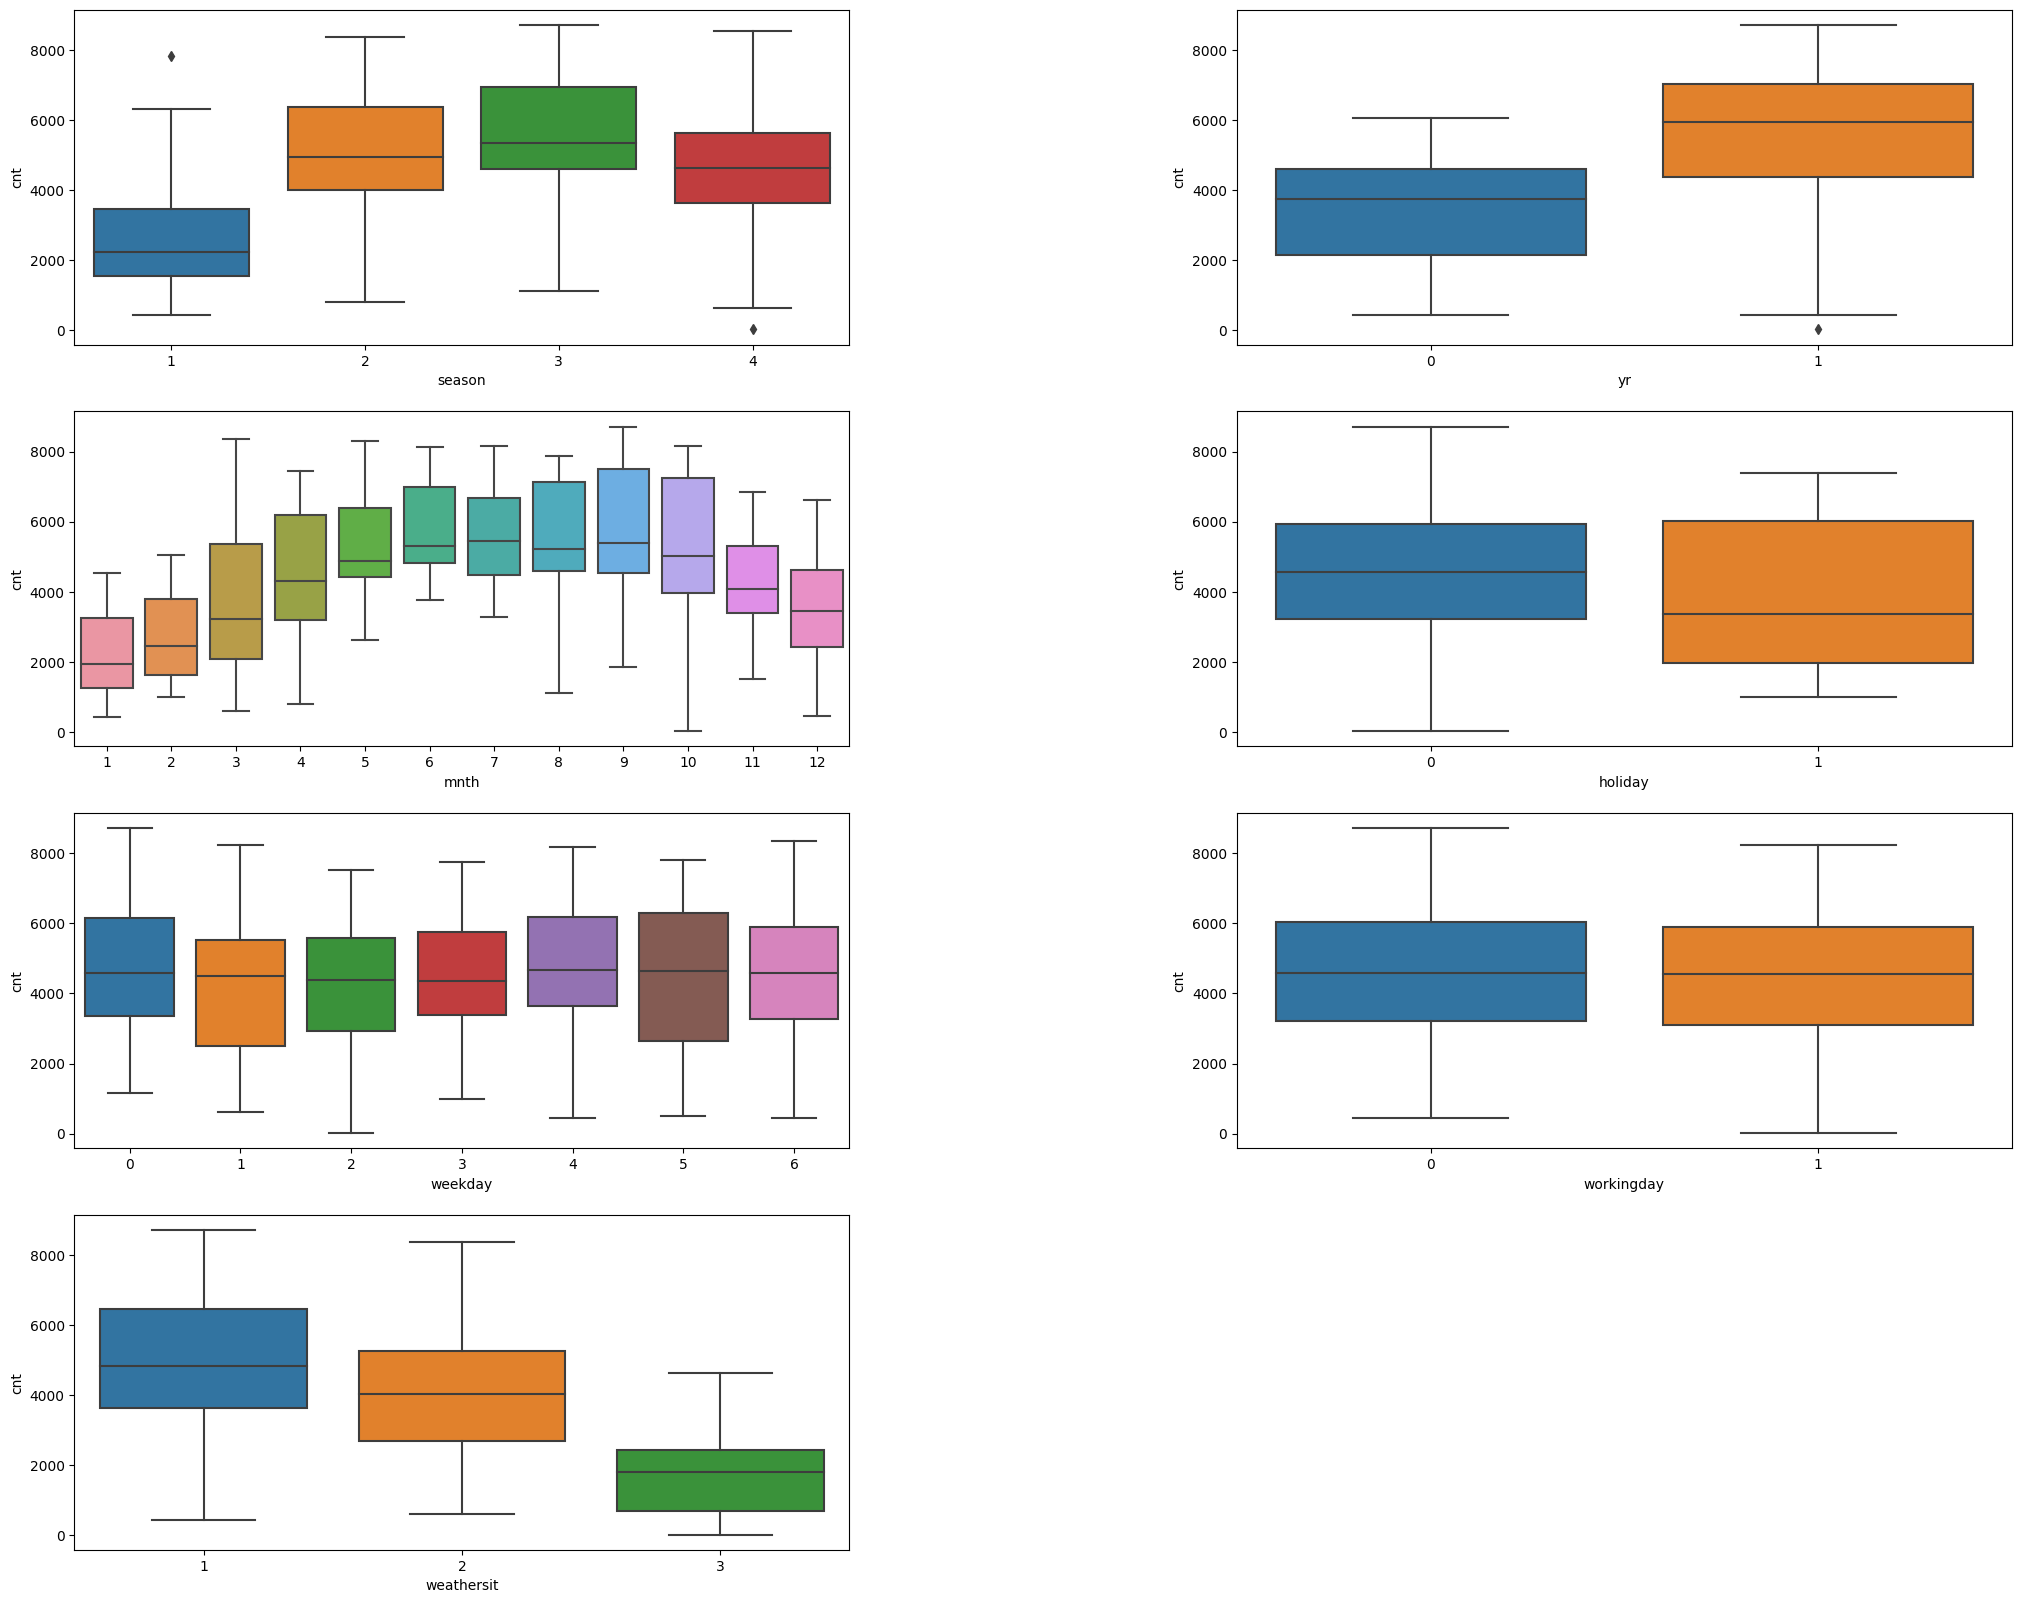

In [12]:
# Lets now compare the categorical variables with out target variable

categorical_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

fig = plt.figure(figsize=(25,20))
for idx, item in enumerate(categorical_vars):
    plt.subplot(4,2,idx+1)
    plt.subplots_adjust(wspace=0.5)
    plt.yticks(fontsize=10)
    sns.boxplot(x=rental[item], y=rental["cnt"])

plt.show()

# Season - Season 3 (fall) has the highest booking rate whereas season 1 (spring) has the lowest compared to other seasons, Hence the rental company should plan their services accordingly.
# Year - Year 2019 was significantly better than the year 2018 in terms of rental counts
# Month - We see the month 5,6,7,8,9,10 have high mean compare to other months, which mean these months have good booking rate
# Holiday - we see maximum booking when it is not a holiday
# Weekday - we don't see a strong pattern in booking irrespective of the day of week
# Working day - we don't see a strong pattern in booking irrespective of whether it is a working day or not
#Why is it important to use drop_first=True during dummy variable creation Weather situation - Weather situation (1) Clear, Few clouds, Partly cloudy, Partly cloudy  is most optimal for rentals

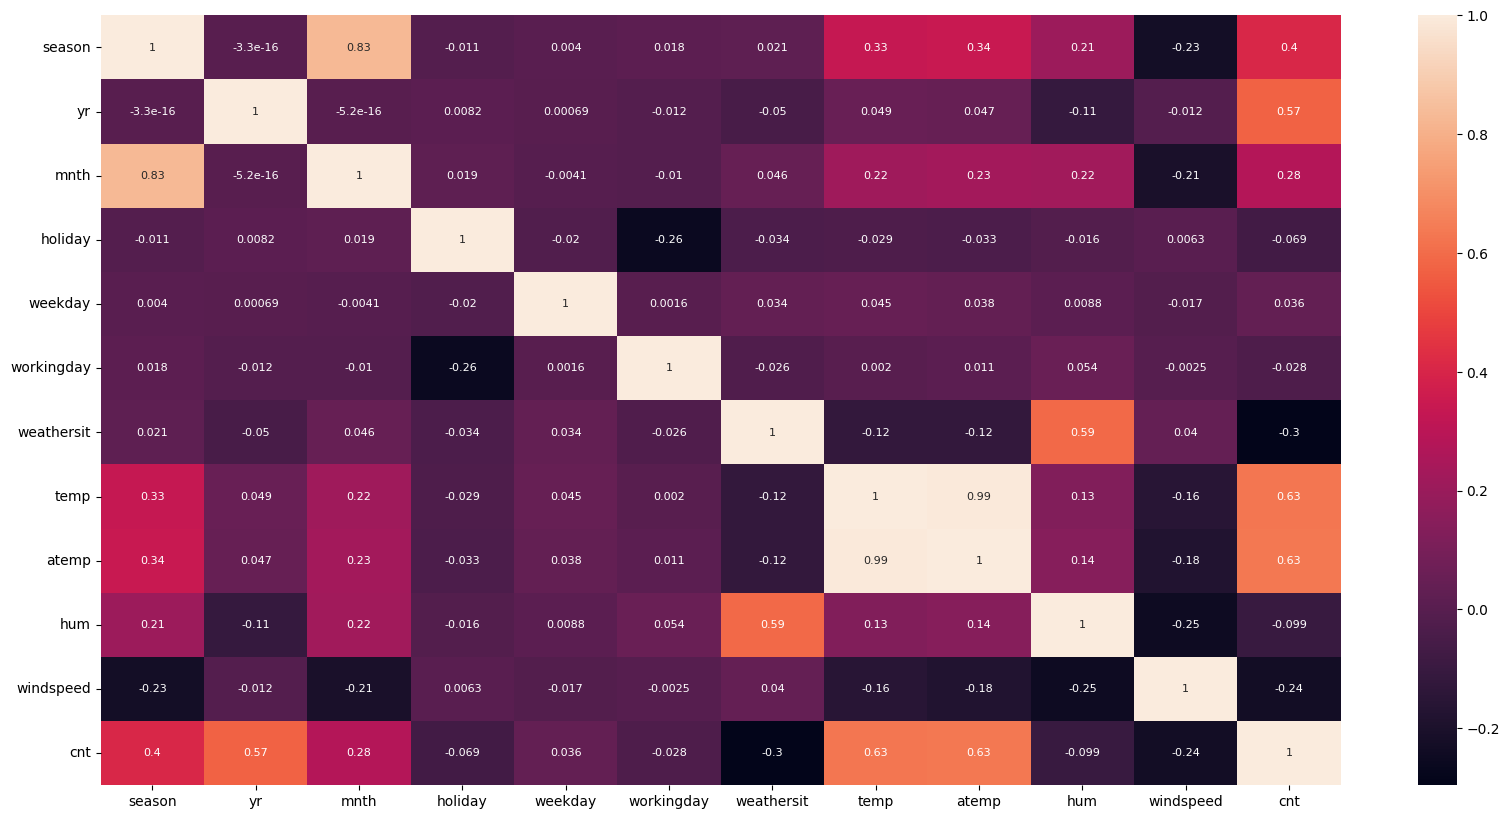

In [13]:
# Lets also understand the correlation between the variable, best way is to create a heat map

plt.figure(figsize = (20,10))
sns.heatmap(rental.corr(),annot = True, annot_kws={"fontsize":8})
plt.show()

# We see that few variables have high multi-collinearity
# mnth - season
# temp - atemp
# We will consider these collinearity while building our model

# Dummies for Categorical variable

In [14]:
# Let identify categorical and numerical variables and treat them accordingly

# categorical variables : Season, weekday, mnth and weathersit
# Numerical variables : holiday, yr, workingday, temp, atemp, hum and windspeed

In [15]:
# Creating dummies for categorical variables

# convert the datatypes of categorical variable in correct type

rental['season'] = rental['season'].astype('category')
rental['weekday'] = rental['weekday'].astype('category')
rental['mnth'] = rental['mnth'].astype('category')
rental['weathersit'] = rental['weathersit'].astype('category')

rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [16]:
# Now let create dummy columns for categorical variables

rental = pd.get_dummies(rental, drop_first=True)
rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

# Train test split

In [17]:
rental.shape

(730, 30)

In [18]:
X_train, X_test = train_test_split(rental, train_size=0.7, test_size=0.3, random_state=100)
print(X_train.shape)
print(X_test.shape)

(510, 30)
(219, 30)


In [19]:
y_train = X_train.pop('cnt')

In [20]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   season_2      510 non-null    uint8  
 8   season_3      510 non-null    uint8  
 9   season_4      510 non-null    uint8  
 10  mnth_2        510 non-null    uint8  
 11  mnth_3        510 non-null    uint8  
 12  mnth_4        510 non-null    uint8  
 13  mnth_5        510 non-null    uint8  
 14  mnth_6        510 non-null    uint8  
 15  mnth_7        510 non-null    uint8  
 16  mnth_8        510 non-null    uint8  
 17  mnth_9        510 non-null    uint8  
 18  mnth_10       510 non-null   

In [21]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 510 entries, 653 to 79
Series name: cnt
Non-Null Count  Dtype
--------------  -----
510 non-null    int64
dtypes: int64(1)
memory usage: 8.0 KB


# Feature Scaling

In [22]:
rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [23]:
# Identify all the numerical columns

numerical_cols = ['temp', 'atemp', 'hum', 'windspeed']
scaler = MinMaxScaler()
# we will use the fit method to allow the scaler object to learn minmax scaling, we will use the same instance to scale test data
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.245098,0.262745,0.24902,...,0.086275,0.084314,0.154902,0.152941,0.135294,0.143137,0.147059,0.129412,0.343137,0.029412
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.430568,0.440557,0.43287,...,0.281045,0.278131,0.362166,0.360284,0.342373,0.350557,0.354512,0.335985,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.000000,1.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Feature selection using RFE

In [24]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [25]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=16)
rfe = rfe.fit(X_train, y_train)


In [26]:
# Check the feature ranking produced by rfe
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 10),
 ('mnth_3', True, 1),
 ('mnth_4', True, 1),
 ('mnth_5', True, 1),
 ('mnth_6', False, 2),
 ('mnth_7', False, 11),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 12),
 ('mnth_12', False, 13),
 ('weekday_1', False, 8),
 ('weekday_2', False, 9),
 ('weekday_3', False, 7),
 ('weekday_4', False, 5),
 ('weekday_5', False, 6),
 ('weekday_6', False, 14),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [27]:
# Columns recommneded by RFE

col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_8', 'mnth_9', 'mnth_10',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [28]:
# Column that are not recommended

X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_2', 'mnth_6', 'mnth_7', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6'],
      dtype='object')

In [29]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Build Linear Model using STATS Models - Iteration 1

In [30]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,25.15
3,hum,15.60
6,season_3,8.85
5,season_2,5.82
4,windspeed,3.93
7,season_4,3.13
10,mnth_5,2.30
9,mnth_4,2.26
14,weathersit_2,2.15
0,yr,2.05


In [31]:
# Import statsmdodels
import statsmodels.api as sm

# Add constant to our dataframe
X_train_it1 = sm.add_constant(X_train_rfe)

In [32]:
lm = sm.OLS(y_train, X_train_it1).fit()

In [33]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.0
Date:                Sun, 30 Apr 2023   Prob (F-statistic):          2.82e-188
Time:                        08:27:27   Log-Likelihood:                -4110.6
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     493   BIC:                             8327.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2071.7612    238.401      8.690   

# Model Iteration 2

In [34]:
# We see season_3 have high VIF and high pe, hence we will not include it to build our model
# We see mnth_4 have very high pe, hence we will not include it to build our model

X_train_it2 = X_train_rfe.drop(["season_3", "mnth_4"], axis = 1)
X_train_it2

,yr,holiday,temp,hum,windspeed,season_2,season_4,mnth_3,mnth_5,mnth_8,mnth_9,mnth_10,weathersit_2,weathersit_3
653,1,0,0.509887,0.575354,0.300794,0,1,0,0,0,0,1,0,0
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,0,0,1,0,0,0,0,1,0
728,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,0.824514,0.605840,0.355596,1,0,0,0,0,0,0,1,0
578,1,0,0.863973,0.679690,0.187140,0,0,0,0,1,0,0,0,0
53,0,0,0.202618,0.435939,0.111379,0,0,0,0,0,0,0,0,0
350,0,0,0.248216,0.577930,0.431816,0,1,0,0,0,0,0,1,0


In [35]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_it2.columns
vif['VIF'] = [variance_inflation_factor(X_train_it2.values, i) for i in range(X_train_it2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.88
2,temp,10.03
4,windspeed,3.75
6,season_4,2.35
5,season_2,2.31
12,weathersit_2,2.14
0,yr,2.02
8,mnth_5,1.63
9,mnth_8,1.62
11,mnth_10,1.61


In [36]:
# Add constant to our dataframe
X_train_it2 = sm.add_constant(X_train_it2)
lm = sm.OLS(y_train, X_train_it2).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.9
Date:                Sun, 30 Apr 2023   Prob (F-statistic):          1.25e-189
Time:                        08:27:27   Log-Likelihood:                -4112.8
No. Observations:                 510   AIC:                             8256.
Df Residuals:                     495   BIC:                             8319.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2081.3149    238.262      8.735   

# Model Iteration 3

In [37]:
# We see mnth_3 and mnth_5 have high PE hence we will not include it in our model 

X_train_it3 = X_train_rfe.drop(["season_3", "mnth_4", "mnth_3", "mnth_5"], axis = 1)
X_train_it3

,yr,holiday,temp,hum,windspeed,season_2,season_4,mnth_8,mnth_9,mnth_10,weathersit_2,weathersit_3
653,1,0,0.509887,0.575354,0.300794,0,1,0,0,1,0,0
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,0,0,0,0,0,1,0
728,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,0.824514,0.605840,0.355596,1,0,0,0,0,1,0
578,1,0,0.863973,0.679690,0.187140,0,0,1,0,0,0,0
53,0,0,0.202618,0.435939,0.111379,0,0,0,0,0,0,0
350,0,0,0.248216,0.577930,0.431816,0,1,0,0,0,1,0


In [38]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_it3.columns
vif['VIF'] = [variance_inflation_factor(X_train_it3.values, i) for i in range(X_train_it3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.41
2,temp,9.88
4,windspeed,3.59
6,season_4,2.27
10,weathersit_2,2.13
0,yr,2.02
5,season_2,1.83
9,mnth_10,1.61
7,mnth_8,1.60
8,mnth_9,1.34


In [39]:
# Add constant to our dataframe
X_train_it3 = sm.add_constant(X_train_it3)
lm = sm.OLS(y_train, X_train_it3).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.3
Date:                Sun, 30 Apr 2023   Prob (F-statistic):          6.02e-191
Time:                        08:27:28   Log-Likelihood:                -4115.2
No. Observations:                 510   AIC:                             8256.
Df Residuals:                     497   BIC:                             8312.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2099.6034    234.805      8.942   

# Model Iteration 4

In [40]:
# We see hum has very high VIF so we will not consider it for our model

X_train_it4 = X_train_rfe.drop(["season_3", "mnth_4", "mnth_3", "mnth_5", "hum"], axis = 1)
X_train_it4

,yr,holiday,temp,windspeed,season_2,season_4,mnth_8,mnth_9,mnth_10,weathersit_2,weathersit_3
653,1,0,0.509887,0.300794,0,1,0,0,1,0,0
576,1,0,0.815169,0.264686,0,0,0,0,0,0,0
426,1,0,0.442393,0.255342,0,0,0,0,0,1,0
728,1,0,0.245101,0.663106,0,0,0,0,0,0,0
482,1,0,0.395666,0.188475,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,0.824514,0.355596,1,0,0,0,0,1,0
578,1,0,0.863973,0.187140,0,0,1,0,0,0,0
53,0,0,0.202618,0.111379,0,0,0,0,0,0,0
350,0,0,0.248216,0.431816,0,1,0,0,0,1,0


In [41]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_it4.columns
vif['VIF'] = [variance_inflation_factor(X_train_it4.values, i) for i in range(X_train_it4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.11
3,windspeed,3.11
0,yr,2.00
5,season_4,1.95
4,season_2,1.82
8,mnth_10,1.60
6,mnth_8,1.59
9,weathersit_2,1.49
7,mnth_9,1.34
10,weathersit_3,1.09


In [42]:
# Add constant to our dataframe
X_train_it4 = sm.add_constant(X_train_it4)
lm = sm.OLS(y_train, X_train_it4).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.1
Date:                Sun, 30 Apr 2023   Prob (F-statistic):          3.21e-187
Time:                        08:27:28   Log-Likelihood:                -4126.9
No. Observations:                 510   AIC:                             8278.
Df Residuals:                     498   BIC:                             8329.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1200.0447    145.814      8.230   

# Model Iteration 5

In [43]:
# We see mnth_10 has high PE value hence we will not use it for our model
# We see temp has VIF greater than 5 which is beyond our threshold
# We cannot remove temp from our model as we feels its hghly significant

# Let try and understand the collinearity of other features with respect to temp using a heatmap

In [44]:
X_train_it5 = X_train_rfe.drop(["season_3", "mnth_4", "mnth_3", "mnth_5", "hum", "mnth_10"], axis = 1)
X_train_it5

,yr,holiday,temp,windspeed,season_2,season_4,mnth_8,mnth_9,weathersit_2,weathersit_3
653,1,0,0.509887,0.300794,0,1,0,0,0,0
576,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1,0,0.442393,0.255342,0,0,0,0,1,0
728,1,0,0.245101,0.663106,0,0,0,0,0,0
482,1,0,0.395666,0.188475,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
526,1,0,0.824514,0.355596,1,0,0,0,1,0
578,1,0,0.863973,0.187140,0,0,1,0,0,0
53,0,0,0.202618,0.111379,0,0,0,0,0,0
350,0,0,0.248216,0.431816,0,1,0,0,1,0


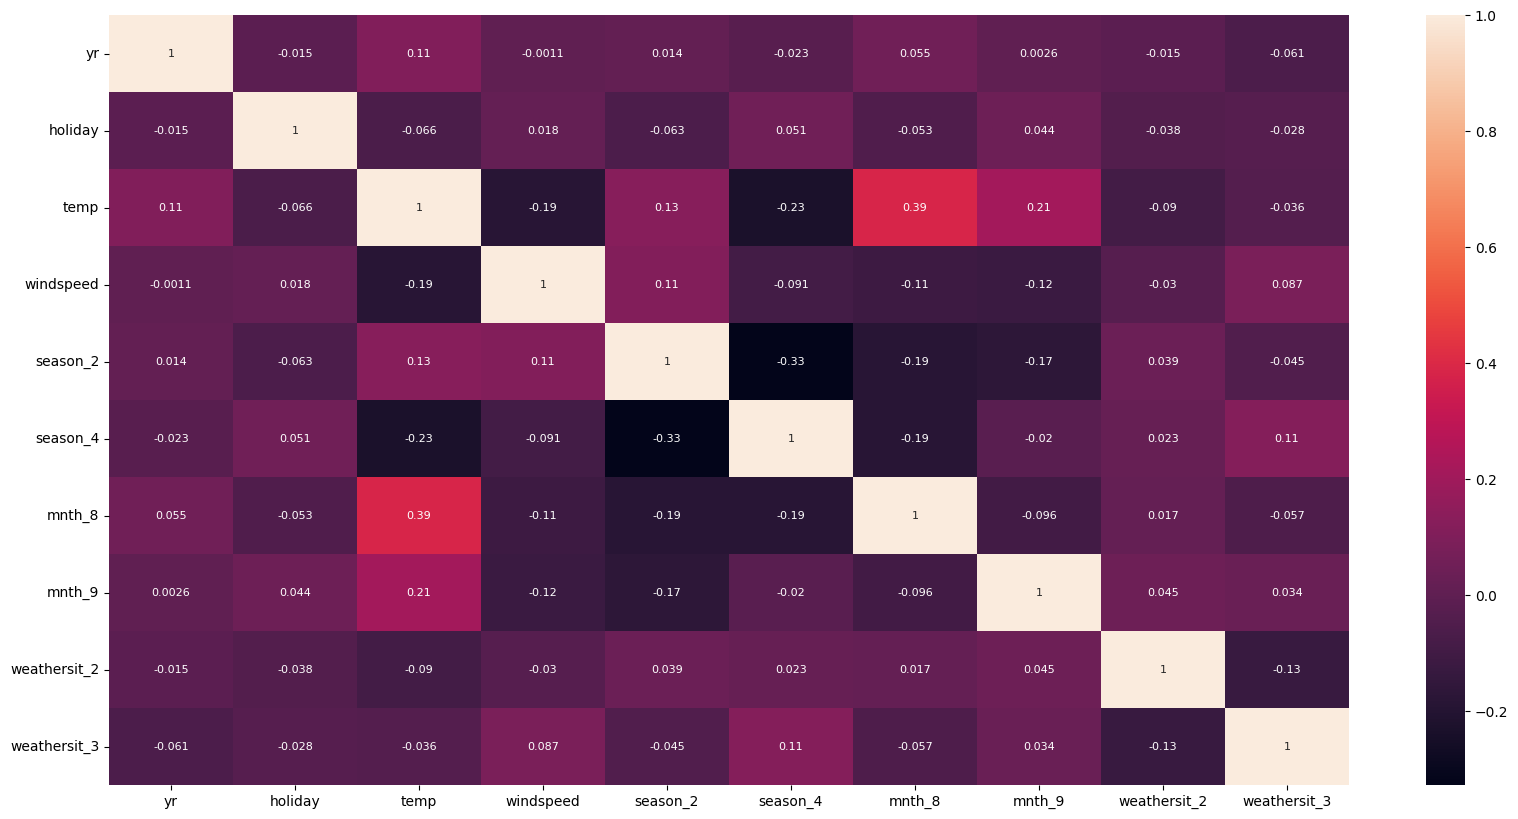

In [45]:
# Lets also understand the correlation between the variable, best way is to create a heat map

plt.figure(figsize = (20,10))
sns.heatmap(X_train_it5.corr(),annot = True, annot_kws={"fontsize":8})
plt.show()

# We see that mnth_8 is correleated with temp, so lets remove mnth_8 and build our model

In [46]:
# high VIF and high PE

X_train_it5 = X_train_rfe.drop(["season_3", "mnth_4", "mnth_3", "mnth_5", "hum", "mnth_10", "mnth_8"], axis = 1)
X_train_it5

,yr,holiday,temp,windspeed,season_2,season_4,mnth_9,weathersit_2,weathersit_3
653,1,0,0.509887,0.300794,0,1,0,0,0
576,1,0,0.815169,0.264686,0,0,0,0,0
426,1,0,0.442393,0.255342,0,0,0,1,0
728,1,0,0.245101,0.663106,0,0,0,0,0
482,1,0,0.395666,0.188475,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
526,1,0,0.824514,0.355596,1,0,0,1,0
578,1,0,0.863973,0.187140,0,0,0,0,0
53,0,0,0.202618,0.111379,0,0,0,0,0
350,0,0,0.248216,0.431816,0,1,0,1,0


In [47]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_it5.columns
vif['VIF'] = [variance_inflation_factor(X_train_it5.values, i) for i in range(X_train_it5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.68
3,windspeed,3.05
0,yr,2.00
4,season_2,1.56
7,weathersit_2,1.48
5,season_4,1.38
6,mnth_9,1.20
8,weathersit_3,1.08
1,holiday,1.03


In [48]:
# Add constant to our dataframe
X_train_it5 = sm.add_constant(X_train_it5)
lm = sm.OLS(y_train, X_train_it5).fit()
print(lm.summary())

# We feel this model has a good R-squared value, also the P values and VIF are well within our threshold.
# Lets go ahead and make predections using this model

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     272.9
Date:                Sun, 30 Apr 2023   Prob (F-statistic):          1.37e-186
Time:                        08:27:30   Log-Likelihood:                -4134.2
No. Observations:                 510   AIC:                             8288.
Df Residuals:                     500   BIC:                             8331.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1120.9826    145.731      7.692   

# Residual Analysis

In [49]:
y_train_pred = lm.predict(X_train_it5)
y_train_pred

653    6307.478222
576    6674.876260
426    4218.402622
728    3428.490516
482    4839.781103
          ...     
526    6659.994090
578    7010.671464
53     1937.790735
350    2169.882240
79     2680.705538
Length: 510, dtype: float64

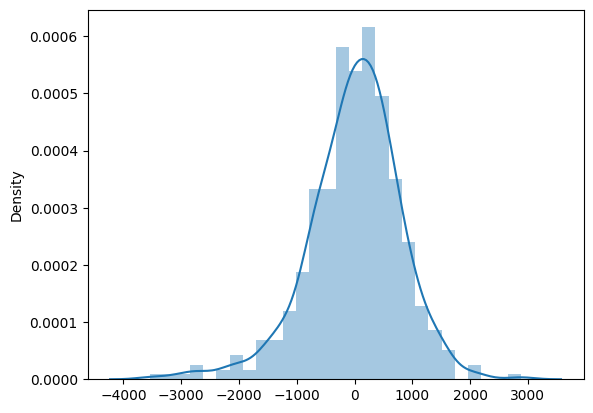

In [50]:
res = y_train - y_train_pred
sns.distplot(res)
plt.show()

# We see the error distribution is normal

# Predection

In [51]:
# Identify all the numerical columns
numerical_cols = ['temp', 'atemp', 'hum', 'windspeed']

# we will use the fit method to allow the scaler object to learn minmax scaling, we will use the same instance to scale test data
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])
X_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,4546.981735,0.264840,0.246575,...,0.073059,0.086758,0.118721,0.123288,0.155251,0.141553,0.132420,0.173516,0.319635,0.027397
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,1898.633630,0.442259,0.432005,...,0.260830,0.282125,0.324202,0.329520,0.362974,0.349389,0.339723,0.379560,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,441.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,3303.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,4579.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,5869.500000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,8395.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
y_test = X_test.pop('cnt')

In [53]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,1.0,0,1,0,0.831783,0.769660,0.657364,0.084219,0,1,...,0,0,0,0,1,0,0,0,1,0
535,1.0,1,0,1,0.901354,0.842587,0.610133,0.153728,1,0,...,0,0,0,0,0,1,0,0,0,0
299,1.0,0,0,0,0.511964,0.496145,0.837699,0.334206,0,0,...,0,0,0,0,0,0,0,1,1,0
221,1.0,0,0,1,0.881625,0.795343,0.437098,0.339570,0,1,...,0,0,0,0,0,0,1,0,0,0
152,1.0,0,0,0,0.817246,0.741471,0.314298,0.537414,1,0,...,0,0,0,0,0,0,0,1,0,0


In [54]:
X_test_sm = X_test_sm[X_train_it5.columns]

In [55]:
y_test_pred = lm.predict(X_test_sm)

In [56]:
from sklearn.metrics import r2_score

In [57]:
r2_score(y_true=y_test, y_pred=y_test_pred)

0.7938290016640651